In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
visa_df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

**categorical vs categorical** 

In [3]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [ ]:
#i want to know out of 16861 members how many got the visa
#we are analysing continent and case status


In [11]:
con1=visa_df['continent']=='Asia' 
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])
#len(visa_df[con])

11012

In [ ]:
visa_df[(visa_df['continent'])]

In [12]:
con1=visa_df['continent']=='Asia' 
con2=visa_df['case_status']=='Denied'
con=con1&con2
len(visa_df[con])

5849

In [5]:
labels=visa_df['continent'].value_counts().keys()
certified=[]
denied=[]
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert=con1&con2
    denied1=con1&con3
    certified.append(len(visa_df[cert]))
    denied.append(len(visa_df[denied1]))
d1=pd.DataFrame(zip(labels,certified,denied),
               columns=['continent','Certified','Denied'])
d1.set_index('continent')
    
   # len(visa_df[cert]),len(visa_df[denied])
    #print(f"{len(visa_df[cert])} are got the visa from  {i}")
    #rint(f"{len(visa_df[denied])} are   rejected the visa from asia {i}")

,Certified,Denied
continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


$crosstab$

In [4]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

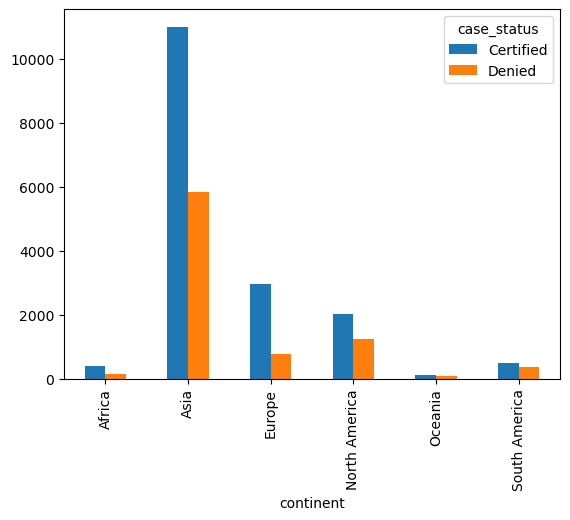

In [5]:
result1.plot(kind='bar')

In [8]:
#continent ,education of employee and case status
col1=visa_df['continent']
col2=[visa_df['case_status'],
         visa_df['education_of_employee']]
result2=pd.crosstab(col1,col2)
result2
#col1 is generally index and col2 represnts as columns

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

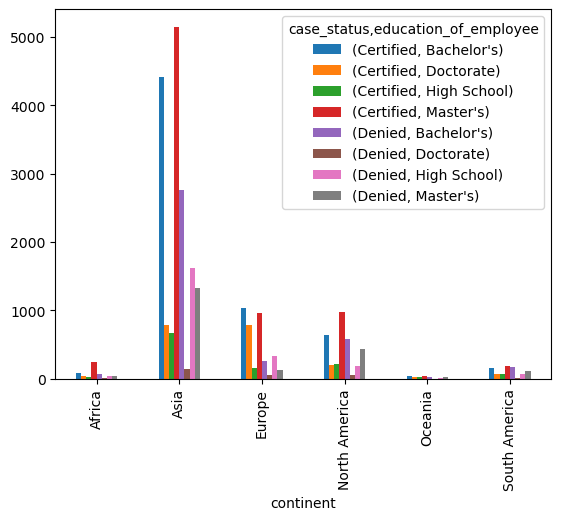

In [9]:
result2.plot(kind='bar')

<Axes: xlabel='education_of_employee'>

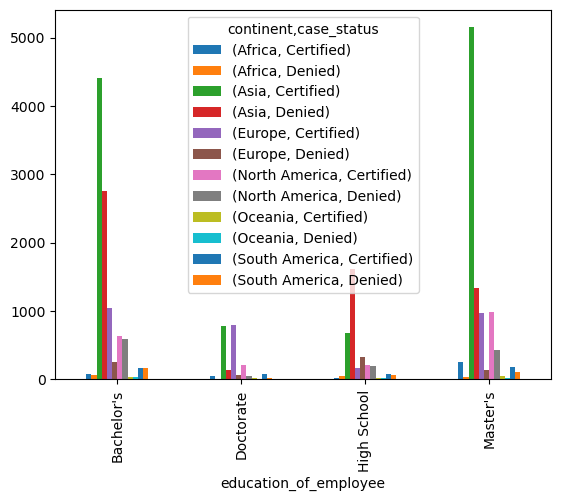

In [10]:
col1=visa_df['education_of_employee']
col2=[visa_df['continent'],
         visa_df['case_status']]
result3=pd.crosstab(col1,col2)
result3.plot(kind='bar')

**numerical vs numerical**

$scatterplots$
- plt.scatter
- will take two arguements x-axis and y-axis
- both variable should be numerical
- it provides ship vetweeen two varibles
  - positicely related
  - negatively realted
  - no relation

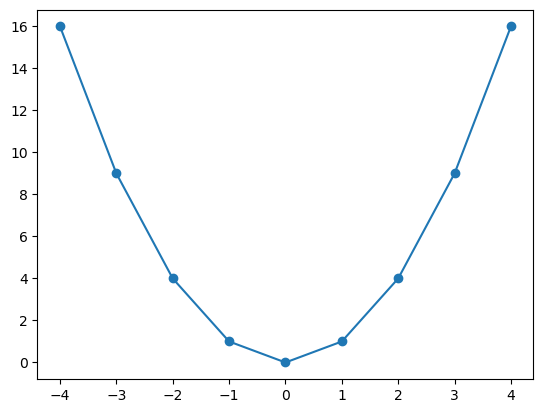

In [15]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)

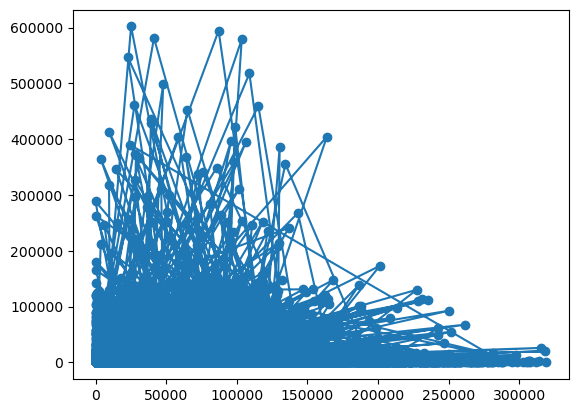

In [6]:
col1=visa_df['prevailing_wage']
col2=visa_df['no_of_employees']
plt.scatter(col1,col2)   
plt.plot(col1,col2)
      

In [16]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
**correltion-cocoeffient**
- denoted with r
- pearson correlation coeffient
- r varies from -1 to 1
- r=0 to 1 positively correlated
- r=0 to -1 negatively
- r=0 no relation
- ρ (X,Y) = cov (X,Y) / σX.σY.

In [20]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


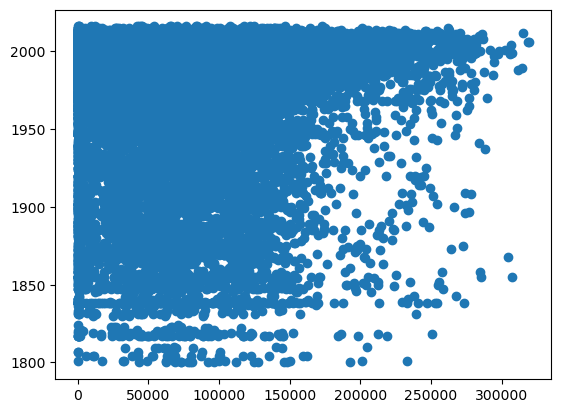

In [22]:
x=visa_df['prevailing_wage']
y=visa_df['yr_of_estab']
plt.scatter(x,y)

$heatmap$

<Axes: >

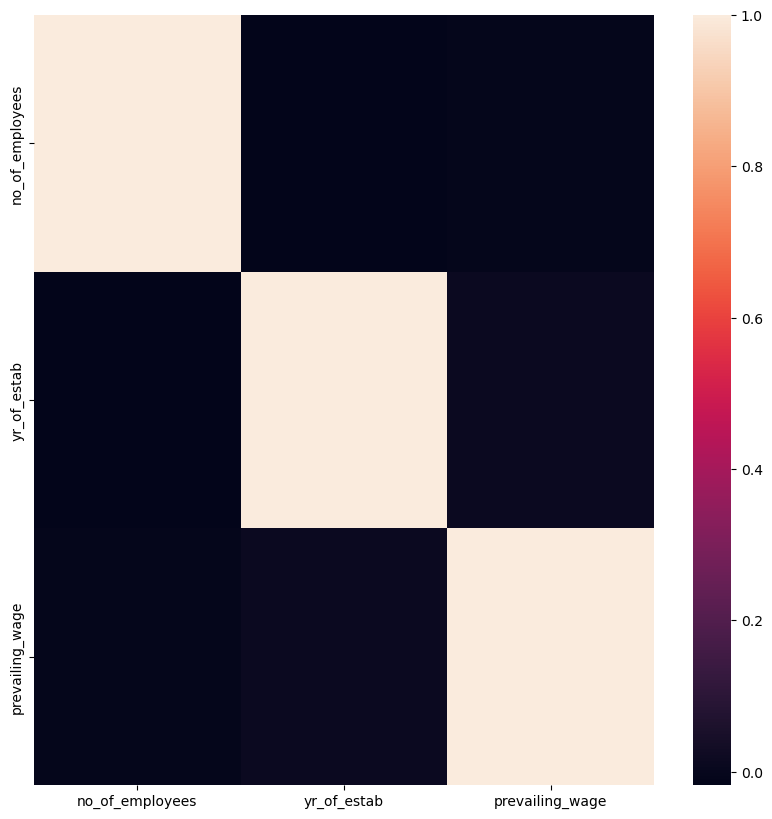

In [27]:
plt.figure(figsize=(10,10))
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr)